In [1]:
import numpy as np
import os
import cv2
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from google.colab import drive
from google.colab.patches import cv2_imshow
from keras.utils.data_utils import random 

drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"
training_dir = root_dir + "/DeepLearning_Hw3/CaltechTinySplit/train/"
testing_dir = root_dir + "/DeepLearning_Hw3/CaltechTinySplit/test/"

Mounted at /content/gdrive


In [2]:
#Convert Image Path to List
train_path = paths.list_images(training_dir)
train_path = sorted(train_path)
test_path = paths.list_images(testing_dir)
test_path = sorted(test_path)

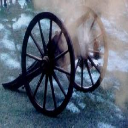

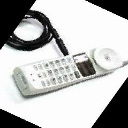

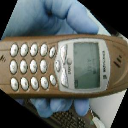

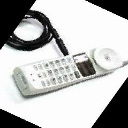

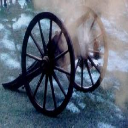

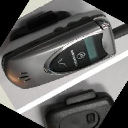

In [3]:
#Add Image Path to List
inputs = []
targets = []
for trainPath in train_path:
    label = trainPath.split(os.path.sep)[-2]
    image = cv2.imread(trainPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #BGR to RGB
    image = cv2.resize(image, (128, 128)) #resize the image to 128 by 128.
    inputs.append(image)
    targets.append(label)
#We print 5 random images
for i in range(0,6):
  rand_num=random.randint(0,len(inputs))
  img=inputs[rand_num]
  cv2_imshow(img)





In [4]:
#We convert our train images to array in float format.
inputs = np.float128( np.array(inputs) ) /255
##We are converting our train labels to array.
targets = np.array(targets)
print(inputs)
print(targets)

[[[[0.98823529 0.96470588 0.84313725]
   [0.97254902 0.9372549  0.80784314]
   [0.97254902 0.96078431 0.81960784]
   ...
   [0.99215686 0.97647059 0.89019608]
   [0.99607843 0.96862745 0.88235294]
   [0.99607843 0.96078431 0.8745098 ]]

  [[0.96862745 0.93333333 0.81176471]
   [0.98039216 0.94509804 0.81568627]
   [0.94117647 0.90588235 0.76078431]
   ...
   [0.98823529 0.94509804 0.85098039]
   [0.99215686 0.94509804 0.85490196]
   [0.99215686 0.9372549  0.84313725]]

  [[0.89411765 0.85882353 0.7372549 ]
   [0.82352941 0.79607843 0.65098039]
   [0.92941176 0.88627451 0.74117647]
   ...
   [0.94509804 0.88235294 0.78039216]
   [0.95686275 0.89411765 0.79215686]
   [0.94509804 0.88235294 0.78431373]]

  ...

  [[0.82352941 0.78823529 0.36862745]
   [0.76470588 0.68235294 0.11372549]
   [0.83137255 0.70196078 0.11372549]
   ...
   [0.77647059 0.71764706 0.31764706]
   [0.76078431 0.69803922 0.31372549]
   [0.79215686 0.72941176 0.36078431]]

  [[0.81960784 0.77647059 0.36078431]
   [0.7

In [5]:
inputs_test = []
targets_test = []
for testPath in test_path:
    label = testPath.split(os.path.sep)[-2]
    image = cv2.imread(testPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    inputs_test.append(image)
    targets_test.append(label)
#We convert our test images to array in float format.
inputs_test = np.float128( np.array(inputs_test) ) /255.0
#We are converting our test labels to array.
targets_test = np.array(targets_test)
print(inputs_test)
print(targets_test)

[[[[0.35294118 0.29411765 0.2745098 ]
   [0.35686275 0.30196078 0.2745098 ]
   [0.39215686 0.34117647 0.30980392]
   ...
   [0.30980392 0.25098039 0.23529412]
   [0.4        0.34117647 0.31372549]
   [0.22745098 0.17254902 0.1372549 ]]

  [[0.41960784 0.36470588 0.34117647]
   [0.39607843 0.34509804 0.31372549]
   [0.43921569 0.39215686 0.35686275]
   ...
   [0.30980392 0.25098039 0.23529412]
   [0.36470588 0.30588235 0.27843137]
   [0.34117647 0.28627451 0.25098039]]

  [[0.45098039 0.40784314 0.37254902]
   [0.43529412 0.39215686 0.35686275]
   [0.45882353 0.41960784 0.38039216]
   ...
   [0.3254902  0.26666667 0.25098039]
   [0.25490196 0.19607843 0.17254902]
   [0.37254902 0.31764706 0.28235294]]

  ...

  [[0.71764706 0.65098039 0.61960784]
   [0.68627451 0.61960784 0.58823529]
   [0.63921569 0.57254902 0.54117647]
   ...
   [0.61960784 0.54509804 0.51372549]
   [0.83529412 0.76078431 0.7372549 ]
   [0.65098039 0.57647059 0.55294118]]

  [[0.76862745 0.69803922 0.67058824]
   [0.7

In [6]:
#With the help of the random function, we create our weights with the size of 1*49152.
W =  np.random.rand(49152,) / 1000
print(W)

[3.98506774e-05 1.60890879e-04 7.87145304e-04 ... 9.18989395e-04
 3.96445053e-04 7.61094477e-04]


In [7]:
#Create the activation functions.
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
def softplus(x):
    return np.log(1 + np.exp(x))
def mish(x):
    return x * tanh(softplus(x))
def dmish(x):
    omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * omega / pow(delta, 2)
    return derivative

In [8]:
x_train=inputs
y_train=targets
X_test=inputs_test
Y_test=targets_test
#We reshape x_train to shape: 1*49152 (for 81 train)
x_train = np.reshape(x_train, (81,49152)) 


In [9]:
#We convert our labels to 0 and 1 by performing labelEncoder operation.
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y_labelencoder = LabelEncoder ()
y_train = y_labelencoder.fit_transform (y_train)
#Cannon class the label is 0, cellphone class the label is 1
print ("After label encoding train labels: \n",y_train)
y_labelencoder = LabelEncoder ()
Y_test = y_labelencoder.fit_transform (Y_test)
print(" ")
print ("After label encoding test labels: ",Y_test)

After label encoding train labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
 
After label encoding test labels:  [0 0 0 0 0 1 1 1 1 1 1 1]


In [10]:
y_train = np.float128( np.array(y_train)) 
X_test = np.reshape(X_test, (12,49152))
Y_test = np.float128( np.array(Y_test) ) 

In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x_train,y_train = shuffle(x_train,y_train,random_state=1)
X_test,Y_test =shuffle(X_test,Y_test,random_state=1)

In [12]:
def train_perceptron(inputs, targets, W, coef, iter):
    for i in range(0,81):
        #feed- forward
        X = inputs[i, :]
        t = targets[i]
        sum = np.dot(X,W)
        y = mish(sum)
        
        ##feed- backward
        error= t- y
        dw = coef*error*dmish(y)*X
        W = W + dw
        
    return W        


In [13]:
rho= 0.0001 #learning rate
iterNo=20000 #iteration numbers
print("Weights_old:", W)
W_new = train_perceptron(x_train, y_train, W, rho, iterNo)
print("Weights_new:", W_new)

Weights_old: [3.98506774e-05 1.60890879e-04 7.87145304e-04 ... 9.18989395e-04
 3.96445053e-04 7.61094477e-04]
Weights_new: [-5.73177504e-04 -4.97086637e-04  1.57950591e-04 ... -1.58514516e-05
 -4.11964251e-04  5.77420651e-05]


In [14]:
np.save('Weights_new.npy', W_new) # saved 
weights = np.load('Weights_new.npy') # load

In [15]:
def testPerceptron(sample_input,sample_target, weights):
    y_true = []
    y_pred = []
    for i in range(0,12):
        X = sample_input[i, :]
        t = sample_target[i]
        y_true.append(t)
        sum = np.dot(X,weights)
        y = mish(sum)
        y = np.round(y)
        if y>1:
          y=1.0
        if y<0:
          y=0.0
        y_pred.append(abs(y))
    return y_true, y_pred

In [16]:
y_true, y_pred = testPerceptron(X_test,Y_test,W_new)

In [17]:
print("True:")
print(y_true)
print("Pred:")
print(y_pred)

True:
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Pred:
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
#Accuracy value is printing
print("Confusion matrix: \n",conf)
print("Accuracy score: %",accuracy*100)


Confusion matrix: 
 [[5 0]
 [0 7]]
Accuracy score: % 100.0
